In [2]:
# useful lib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures 
import numpy as np
from datetime import date

In [3]:
# Read the csv file
df= pd.read_csv("kc_house_data.csv")

In [4]:
print(df.index)
print(df.columns) 

RangeIndex(start=0, stop=21613, step=1)
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


- Sample of size 21613 observation and 21 features 

In [5]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [8]:
df.isnull().sum().sum()

0

- Firt view there is no null values in dataset
- Only one feature date object type
- No null in the dataset

# Creating new features from date and converting type to int 

In [9]:
df['bathrooms']= df['bathrooms'].astype(int)
df['year']= df['date'].str[:4]
df['month']= df['date'].str[4:6]
df['year']= df['year'].astype(int)
df['month']= df['month'].astype(int)
df['nbRooms']= df['bathrooms']+ df['bedrooms']
df['ageHouse']= date.today().year- df['yr_built']
df.drop(['id','date'],axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,nbRooms,ageHouse
0,221900.0,3,1,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,4,67
1,538000.0,3,2,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,5,71
2,180000.0,2,1,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,3,89
3,604000.0,4,3,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,7,57
4,510000.0,3,2,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,5,35


Creating seasons

In [10]:
seasons = {(1, 12, 2): 1, (3, 4, 5): 2, (6, 7, 8): 3, (9, 10, 11): 4}
def season(ser):
    for k in seasons.keys():
        if ser in k:
            return seasons[k]

df['seasons']= df.month.apply(season)

# Features
id :a notation for a house

date: Date house was sold

price: Price is prediction target

bedrooms: Number of Bedrooms/House

bathrooms: Number of bathrooms/bedrooms

sqft_living: square footage of the home

sqft_lot: square footage of the lot

floors :Total floors (levels) in house

waterfront :House which has a view to a waterfront

view: Has been viewed

condition :How good the condition is Overall

grade: overall grade given to the housing unit, based on King County grading system

sqft_above :square footage of house apart from basement

sqft_basement: square footage of the basement

yr_built :Built Year

yr_renovated :Year when house was renovated

zipcode:zip code

lat: Latitude coordinate

long: Longitude coordinate

sqft_living15 :Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

sqft_lot15 :lotSize area in 2015(implies-- some renovations)

In [11]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,nbRooms,ageHouse,seasons
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,1.749734,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423,5.120576,50.994864,2.590293
std,3.671272e+05,0.930062,0.734873,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308,1.429699,29.373411,1.026014
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,0.000000,7.000000,1.000000
25%,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,4.000000,4.000000,25.000000,2.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000,5.000000,47.000000,3.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000,6.000000,71.000000,3.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,34.000000,122.000000,4.000000


# Visualisation

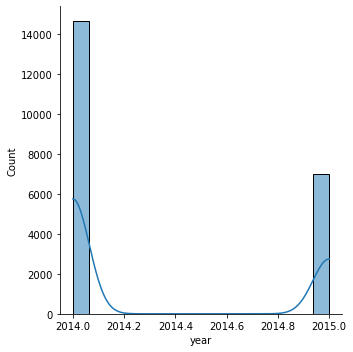

In [11]:
sns.displot(data=df, x="year", kde=True)

# Comment 1
- More houses were sold in 2014 than in 2015. mean(2014.32)

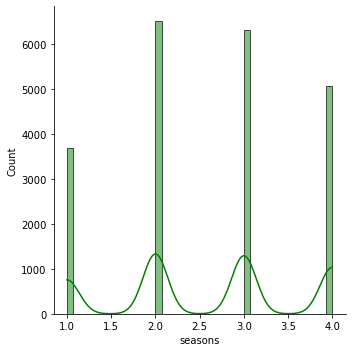

In [12]:
sns.displot(data=df, x="seasons", kde=True, color='green')

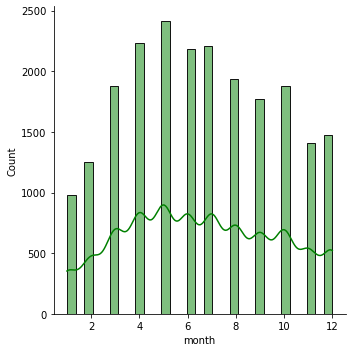

In [13]:
sns.displot(data=df, x="month", kde=True, color='green')

- More houes are sold in the Spring and Summer 
- Speacily in April Mai and July 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living'>

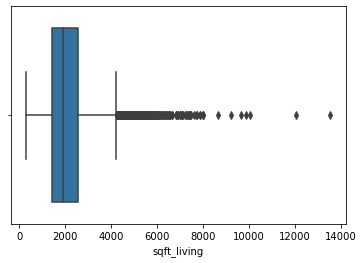

In [14]:
sns.boxplot(df['sqft_living'])

# Comment 2
Distribution of the houses according to the square footage of the home show that:
- Almost 80% of the houses are between 500 to 4500 and the 2000 square is the mode
- Gretter than 4500 are outliers should be handeld 

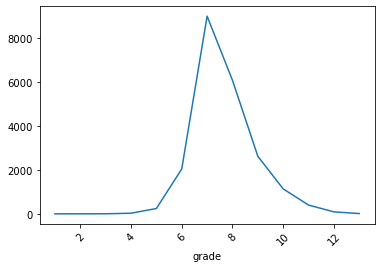

In [15]:
g1 = df.groupby('grade')['grade'].count() 
# plot the result
g1.plot()
plt.xticks(rotation=45)
plt.show()

# Comment 3

- Almost 80% of houses having grade between 6 and 10
- The mode grade is 7 (more houses are classified as 7 grade)

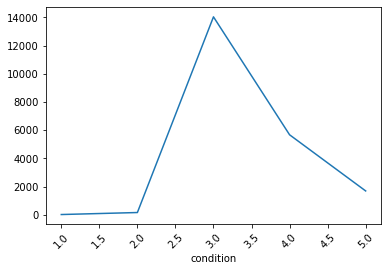

In [16]:
g2 =df.groupby('condition')['condition'].count() 
# plot the result
g2.plot()
plt.xticks(rotation=45)
plt.show()

# Comment 4
- Almost 80% of houses having condition between 2 and 4
- The mode condition is 3 

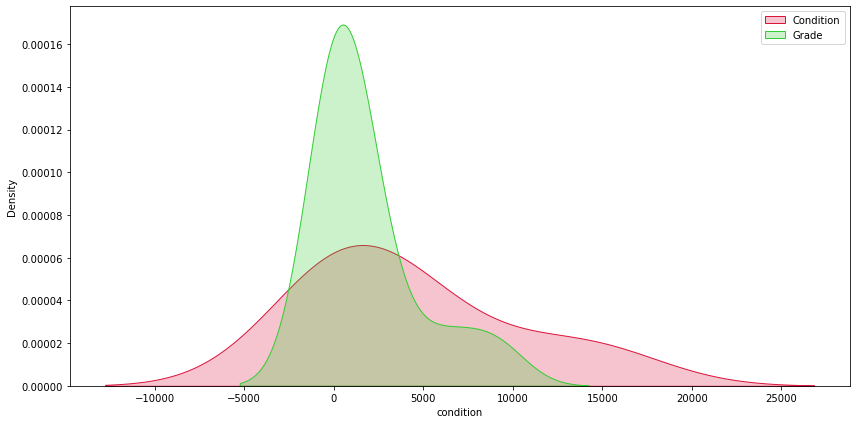

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=df.groupby('condition')['condition'].count() ,
            color='crimson', label='Condition', fill=True, ax=ax)
sns.kdeplot(data=df.groupby('grade')['grade'].count(),
            color='limegreen', label='Grade', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

# Comment 5
From visualisation and my undrestanding of the dataset: condition is an important feature 

# Visualisation ralated to the price 

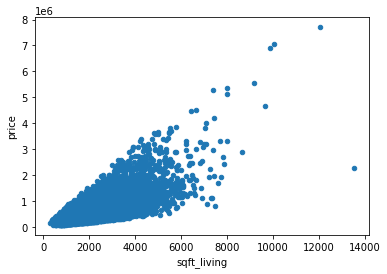

In [18]:
df.plot(kind='scatter', x= 'sqft_living',y= 'price')
plt.show()

- In general if the square incresed so do the price

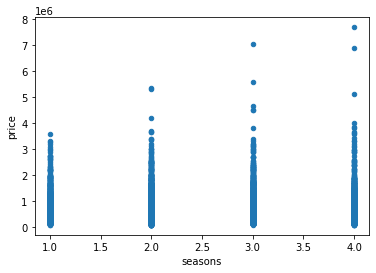

In [19]:
df.plot(kind='scatter', x= 'seasons',y= 'price')
plt.show()

- The price can higher in season 4 (automn) and 3 (Summer) for some cases comparing to seasons 2 (Spring) and winter
- The price for Winter is not that high for all instances in dataset  

# Feature selection

In [12]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

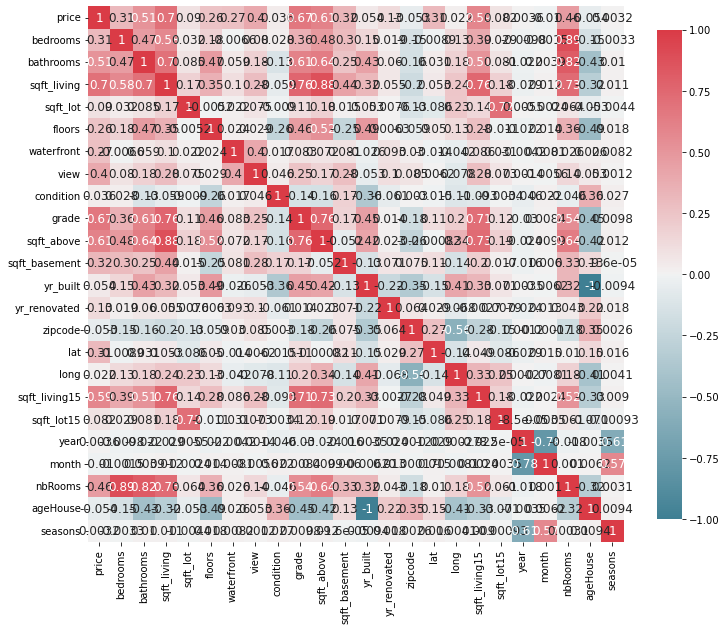

In [13]:
plot_correlation_map(df)

# Comment 6
- Feature that has correlation with others it's less segnificant.
- 5 features has fort correlation : sqft_living, bathrooms, grade, sqft_above, sqft_living15
- Feature more correlated with price : sqft_living then grade and sqlft_above
- The new feature created 'seasons' not correlated to price ==> eliminate seasons and month columns
- Also eliminate yr-renovated and sqft_lot not correlated to the price or to any other feature
- For more feature selection i will use BIC, AIC metrics

In [14]:
myModel1 = smf.ols(formula = "price ~ ageHouse+nbRooms+seasons+month+year+ bedrooms + bathrooms + sqft_living +sqft_lot +floors + waterfront + view + condition +grade + sqft_above + sqft_basement + yr_built + yr_renovated + zipcode +lat +long +sqft_living15 +sqft_lot15", data=df)
result1 = myModel1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     2560.
Date:                Sun, 11 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:18:54   Log-Likelihood:            -2.9447e+05
No. Observations:               21613   AIC:                         5.890e+05
Df Residuals:                   21592   BIC:                         5.892e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -38.7534      5.085     -7.621      0.000     -48.721     -28.786
ageHouse      -3.789e+04   5144.969     -7.365      0.000    -4.8e+04   -2.78e+04
nbRooms        4862.2814   1068.600      4.550      0.000    2767.747    6956.816
seasons        4789.2129   1709.692      2.801      0.005    1438.090    8140.335
month           977.1084    715.437      1.366      0.172    -425.201    2379.418
year           4.172e+04   4946.478      8.434      0.000     3.2e+04    5.14e+04
bedrooms      -4.057e+04   1670.569    -24.285      0.000   -4.38e+04   -3.73e+04
bathrooms      4.543e+04   2097.153     21.664      0.000    4.13e+04    4.95e+04
sqft_living     108.7282      2.192     49.612      0.000     104.432     113.024
sqft_lot          0.1191      0.048      2.500      0.012       0.026       0.213
floors         4986.8013   3545.002      1.407      0.160   -1961.664    1.19e+04
waterfront     5.852e+05   1.73e+04     33.907      0.000    5.51e+05    6.19e+05
view           5.231e+04   2127.614     24.585      0.000    4.81e+04    5.65e+04
condition      2.879e+04   2337.086     12.317      0.000    2.42e+04    3.34e+04
grade           9.64e+04   2136.553     45.119      0.000    9.22e+04    1.01e+05
sqft_above       68.9319      2.245     30.703      0.000      64.531      73.333
sqft_basement    39.7962      2.570     15.482      0.000      34.758      44.834
yr_built      -4.047e+04   5137.736     -7.877      0.000   -5.05e+04   -3.04e+04
yr_renovated     20.5282      3.622      5.667      0.000      13.428      27.628
zipcode        -587.9323     32.787    -17.932      0.000    -652.197    -523.667
lat            6.056e+05   1.07e+04     56.743      0.000    5.85e+05    6.27e+05
long          -2.112e+05   1.31e+04    -16.169      0.000   -2.37e+05   -1.86e+05
sqft_living15    23.4895      3.430      6.848      0.000      16.766      30.213
sqft_lot15       -0.3779      0.073     -5.189      0.000      -0.521      -0.235
==============================================================================
Omnibus:                    18296.733   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1865296.958
Skew:                           3.536   Prob(JB):                         0.00
Kurtosis:                      47.959   Cond. No.                     2.71e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.99e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Comment 7
- All the features has P value < 0.05 except month ==> eliminating month, floors feature 
- Will use another metrics to eliminate some unsegnificant features (VIF)

# VIF 

In [15]:

#gather features
features =df.drop(columns=['price'])
features.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,nbRooms,ageHouse,seasons
0,3,1,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,4,67,4
1,3,2,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,5,71,1
2,2,1,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,3,89,1
3,4,3,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,7,57,1
4,3,2,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,5,35,1


In [16]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = features.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]
print(vif_data)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


          feature           VIF
0        bedrooms           inf
1       bathrooms           inf
2     sqft_living           inf
3        sqft_lot  2.102872e+00
4          floors  1.978904e+00
5      waterfront  1.204035e+00
6            view  1.435573e+00
7       condition  1.249081e+00
8           grade  3.406155e+00
9      sqft_above           inf
10  sqft_basement           inf
11       yr_built  5.539341e+07
12   yr_renovated  1.143221e+00
13        zipcode  1.661948e+00
14            lat  1.181083e+00
15           long  1.827367e+00
16  sqft_living15  2.984950e+00
17     sqft_lot15  2.135268e+00
18           year  2.889302e+00
19          month  2.682669e+00
20        nbRooms           inf
21       ageHouse  4.950965e+04
22        seasons  1.661744e+00


# Comment 8
- In the case of perfect correlation, we get R2 =1, which lead to VIF=1/(1-R2) infinity.
- In this dataset we have inf between : sqft_basement, sqft_above, sqft_living.
- To solve this problem we need to drop at least one of the variables from the dataset which is causing this perfect multicollinearity.
- From comment 6: i choose sqft_basement, sqft_above and nbRooms

- Final features selected (15) :
'year', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'grade','yr_built',  'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'
- Most important : sqft_living

# Linear regression

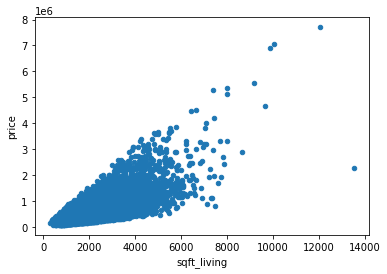

In [25]:
df.plot(kind='scatter', x= 'sqft_living',y= 'price')
plt.show()

In [26]:
X=df[['sqft_living']] # selected features 
Y= df[['price']]# select the target survived4
# split  data into train and test test_size =0.3
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.30, random_state=12)

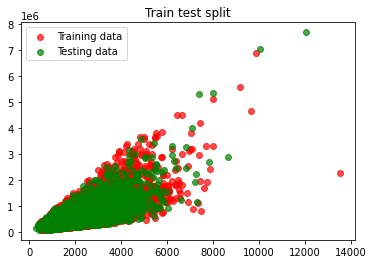

In [27]:
plt.scatter(X_train, Y_train, label ='Training data', color='r', alpha=.7)
plt.scatter(X_test, Y_test, label ='Testing data', color='g', alpha=.7)
plt.legend()
plt.title('Train test split')
plt.show()

In [28]:
model=LinearRegression()   #build linear regression model
model.fit(X_train,Y_train)  #fitting the training data
Y_pred=model.predict(X_test) #testing our model’s performance
scoreLR= metrics.r2_score(Y_test,Y_pred)
print("R squared", scoreLR)

R squared 0.5108518566399103


- In the correlation matrix we observe that there are several featuress correlated with the price, as we use only one feature so it's logic that score is not that high

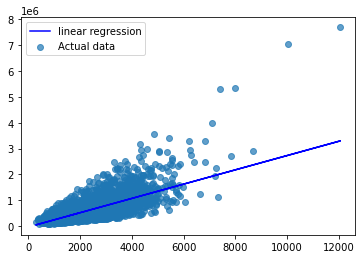

In [29]:
plt.plot(X_test,Y_pred, label='linear regression', color ='b')
plt.scatter(X_test, Y_test, label ='Actual data', alpha=.7)
plt.legend()
plt.show()

# Multiple-linear regression

In [28]:
X=df[['ageHouse','year','bedrooms','bathrooms', 'sqft_living','floors','waterfront', 'view','grade','yr_built','lat', 'long', 'sqft_lot15','condition' , 'zipcode'
 ,'sqft_living15' ]]
 # selected features 
Y= df['price']# select the target survived
# split  data into train and test test_size =0.3
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.30, random_state=123)

In [29]:
def normalize (df):
    features= df.columns
    for column in features:
        mu = df[column].mean()
        sigma = df[column].std()
        df[column] = (df[column] - mu)/sigma

In [30]:
normalize(X_train)

C:\Users\HP\AppData\Local\Temp/ipykernel_24416/2423762491.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = (df[column] - mu)/sigma


In [31]:
normalize(X_test)

C:\Users\HP\AppData\Local\Temp/ipykernel_24416/2423762491.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = (df[column] - mu)/sigma


In [32]:
model=LinearRegression()   #build linear regression model
model.fit(X_train,Y_train)  #fitting the training data
Y_pred=model.predict(X_test) #testing our model’s performance
scoreMultiple=  metrics.r2_score(Y_test,Y_pred)
print("R squared",scoreMultiple)
resq = model.score(X_train,Y_train)
print("Rsq",resq)

R squared 0.7131780382656934
Rsq 0.697183724343678


- score of multi-linear regression is much better than linear regression as mentioned previously from correlation matrix there is more than one feature correlated with the price they can't be ignored predecting the price using only one feature

# Polynomial regression

In [33]:
X=df[['ageHouse','year','bedrooms','bathrooms', 'sqft_living','floors','waterfront', 'view','grade','yr_built','lat', 'long', 'sqft_lot15','condition' , 'zipcode'
 ,'sqft_living15']].values # selected features 
Y= df['price'].values# select the target survived
poly= PolynomialFeatures(degree=2)

In [34]:
poly1= poly.fit_transform(X)

In [35]:
poly.fit(poly1,Y)

PolynomialFeatures()

In [36]:
model1=LinearRegression()
model1.fit(poly1, Y)

LinearRegression()

In [37]:
Y_poly1= model1.predict(poly1)
scorePly= metrics.r2_score(Y,Y_poly1)
print("R squared", scorePly)

R squared 0.8229766528676558


# comment

Score is better in Polynimial regression than multiple-regression than linear

In [40]:
print(scoreLR)
print(scoreMultiple)
print(scorePly)

0.5108518566399103
0.7131083369874986
0.8229724032352184
